In [18]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/lens_profiles.csv')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

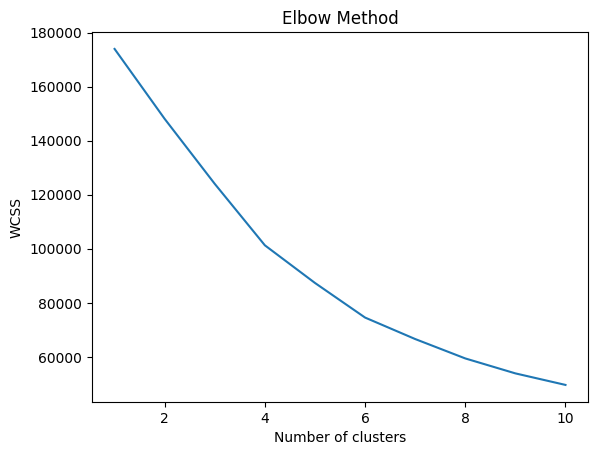

In [12]:
wcss = []  # within-cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(data_scaled)

In [14]:
df['cluster'] = pred_y

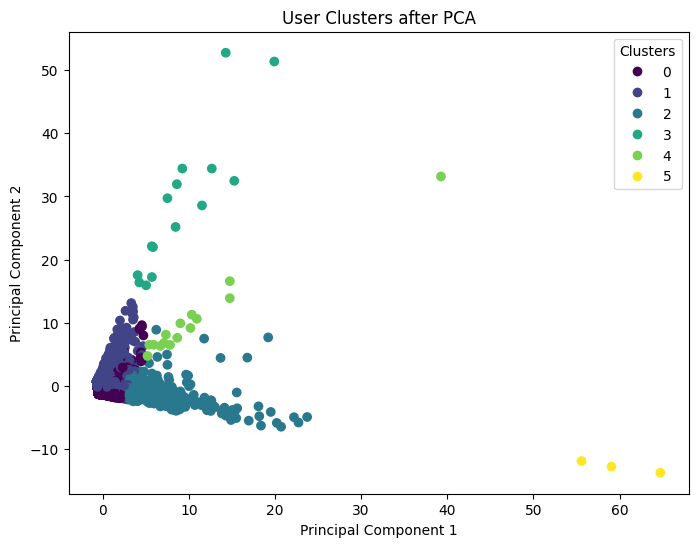

In [19]:

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Append the PCA results to the dataframe
df_pca = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
df_pca['Cluster'] = pred_y

# Create a scatterplot
plt.figure(figsize=(8, 6))

scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')

plt.title('User Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.legend(*scatter.legend_elements(), title="Clusters")

plt.show()


In [20]:
df.to_csv('../data/clusters.csv')

### Clusters 0 and 1 are very similar. They are the vast majority of Lens users. Those users have low follower count, they most not as frequent nor comment or mirror much. I would label them as "Base users"

In [22]:
df.loc[df.cluster == 0].describe()

,profileid,follower_count,post_count,comment_count,mirror_count,cluster
count,12666.000000,12666.000000,12666.000000,12666.000000,12666.000000,12666.0
mean,80532.228644,151.011606,66.528896,5.291489,13.562609,0.0
std,17842.915136,369.586373,131.300275,7.790100,18.516682,0.0
min,33431.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,65182.250000,20.000000,10.000000,1.000000,2.000000,0.0
50%,79107.500000,60.000000,29.000000,2.000000,6.000000,0.0
75%,95167.750000,156.000000,69.000000,6.000000,16.000000,0.0
max,117367.000000,13241.000000,2482.000000,101.000000,130.000000,0.0


In [23]:
df.loc[df.cluster == 1].describe()

,profileid,follower_count,post_count,comment_count,mirror_count,cluster
count,21197.000000,21197.000000,21197.000000,21197.000000,21197.000000,21197.0
mean,25611.238194,145.818795,49.496438,6.635939,10.751663,1.0
std,15785.296955,693.379007,91.959608,9.288242,14.742334,0.0
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,13044.000000,14.000000,8.000000,2.000000,2.000000,1.0
50%,24434.000000,40.000000,24.000000,4.000000,5.000000,1.0
75%,39120.000000,108.000000,55.000000,7.000000,13.000000,1.0
max,54559.000000,22112.000000,2195.000000,122.000000,127.000000,1.0


### Cluster 2 are users that post more than clusters 0 and 1. They tend to mirror more than others. I would label them as the "reflectors"

In [24]:
df.loc[df.cluster == 2].describe()

,profileid,follower_count,post_count,comment_count,mirror_count,cluster
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.0
mean,57106.774916,396.466965,169.604703,58.591265,165.603583,2.0
std,32462.834248,1143.293220,229.556395,64.680846,113.956848,0.0
min,300.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,28281.000000,57.000000,38.000000,10.000000,90.000000,2.0
50%,59349.000000,156.000000,91.000000,47.000000,137.000000,2.0
75%,84486.000000,356.000000,182.000000,85.000000,202.000000,2.0
max,115845.000000,15284.000000,1714.000000,509.000000,889.000000,2.0


### Cluster 3 have a huge follower count, those are the "influencers"

In [25]:
df.loc[df.cluster == 3].describe()

,profileid,follower_count,post_count,comment_count,mirror_count,cluster
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,1789.933333,50414.533333,251.666667,30.533333,41.733333,3.0
std,6736.193281,20091.963869,408.697525,41.076352,38.257523,0.0
min,1.000000,27745.000000,10.000000,1.000000,3.000000,3.0
25%,9.500000,34272.500000,74.500000,4.500000,11.000000,3.0
50%,36.000000,50112.000000,104.000000,10.000000,20.000000,3.0
75%,105.000000,59861.500000,237.000000,47.500000,60.500000,3.0
max,26139.000000,93244.000000,1632.000000,149.000000,107.000000,3.0


### Cluster 4 post heavily. Those are the "extroverts"

In [26]:
df.loc[df.cluster == 4].describe()

,profileid,follower_count,post_count,comment_count,mirror_count,cluster
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,59380.800000,896.266667,5217.866667,14.466667,45.133333,4.0
std,38851.366974,1069.127379,3466.768933,20.212679,73.832694,0.0
min,1917.000000,62.000000,2697.000000,1.000000,1.000000,4.0
25%,31561.500000,342.000000,3477.000000,1.500000,9.000000,4.0
50%,67917.000000,403.000000,4027.000000,5.000000,17.000000,4.0
75%,91567.000000,1074.000000,5561.500000,22.500000,48.500000,4.0
max,113034.000000,3818.000000,16518.000000,72.000000,296.000000,4.0


### Cluster 5 comments heavily. Those are users that do not post as much and do not have as much followers. I would label them as "commentors"

In [27]:
df.loc[df.cluster == 5].describe()

,profileid,follower_count,post_count,comment_count,mirror_count,cluster
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,30145.000000,127.000000,242.666667,1393.666667,870.666667,5.0
std,22.538855,25.865034,13.650397,124.729040,56.438757,0.0
min,30119.000000,99.000000,228.000000,1299.000000,806.000000,5.0
25%,30138.000000,115.500000,236.500000,1323.000000,851.000000,5.0
50%,30157.000000,132.000000,245.000000,1347.000000,896.000000,5.0
75%,30158.000000,141.000000,250.000000,1441.000000,903.000000,5.0
max,30159.000000,150.000000,255.000000,1535.000000,910.000000,5.0
